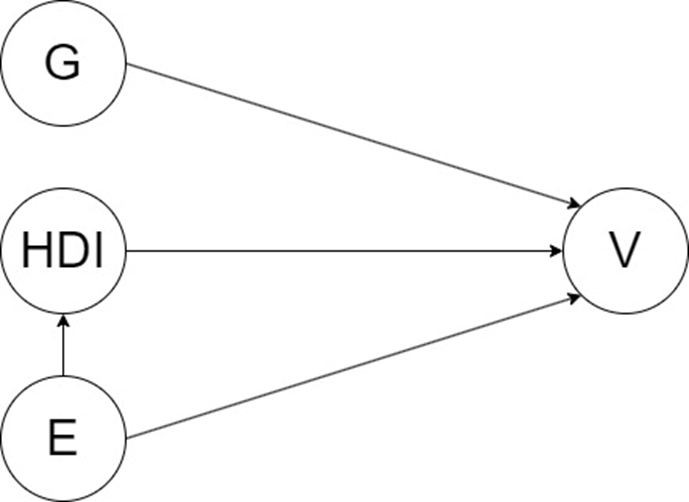

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel
import seaborn as sns
import arviz as az




file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)

data.head()


C:\Users\szczy\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,Year,State,Democratic %,Gun ownership %,HDI,Unemployment %
0,1992,Alabama,0.409,0.552,0.839,0.07525
1,1996,Alabama,0.432,0.568,0.850,0.05208
2,2000,Alabama,0.416,0.538,0.853,0.04625
3,2004,Alabama,0.368,0.516,0.861,0.05575
4,2008,Alabama,0.387,0.503,0.867,0.05883


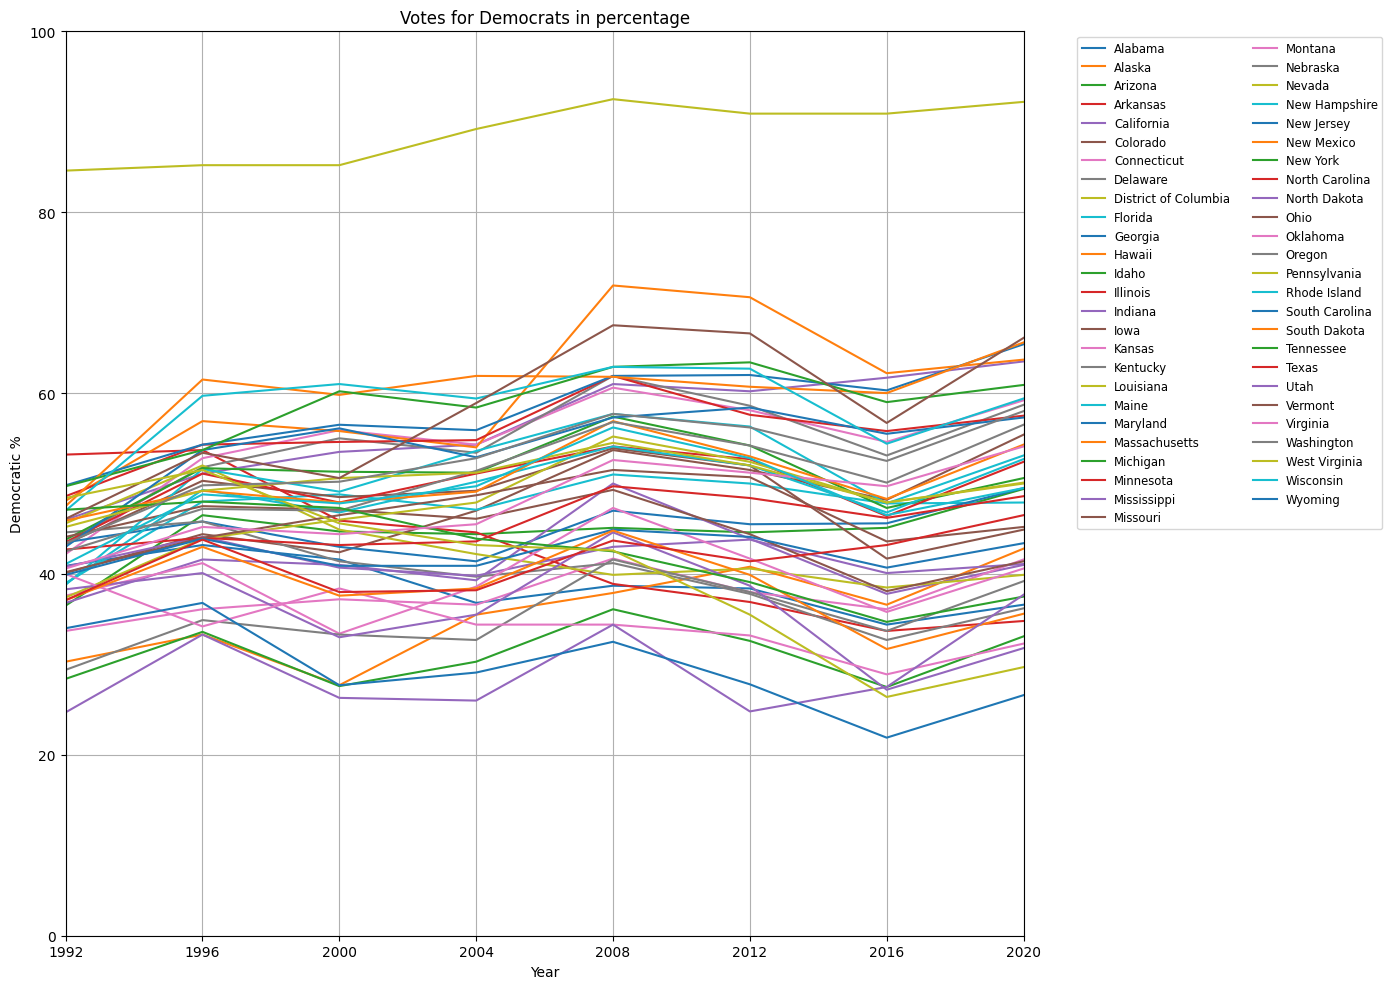

In [100]:
plt.figure(figsize=(14, 10))

for state in data["State"].unique():
    state_data = data[data["State"] == state]
    plt.plot(state_data["Year"], state_data["Democratic %"] * 100, label=state)

plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.xticks(np.linspace(1992, 2020, 8))
plt.xlim([1992, 2020])
plt.ylim([0, 100])
plt.show()


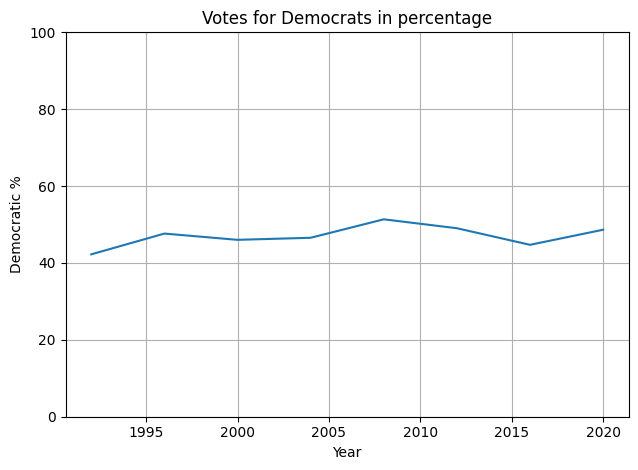

In [101]:
mean_democratic_votes = [data[data['Year'] == year]['Democratic %'].mean()*100 for year in data["Year"].unique()]

plt.plot(data["Year"].unique(), mean_democratic_votes)

plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in percentage')
plt.grid(True)
plt.tight_layout()
# plt.xticks(np.linspace(1992, 2020, 8))
# plt.xlim([1992, 2020])
plt.ylim([0, 100])
plt.show()


In [102]:
import pandas as pd
from cmdstanpy import CmdStanModel
import matplotlib.pyplot as plt

# Load the data
file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)
data = data.dropna()
data['Year'] = data['Year'].astype(str).str.strip()

# Prepare data for prior predictive check
stan_data_prior = {
    'N': len(data),
    'HDI': data['HDI'].values,
    'G': data['Gun ownership %'].values
}

# Compile and run the prior predictive model
stan_file_prior = 'model_1_pp.stan'
model_prior = CmdStanModel(stan_file=stan_file_prior)
fit_prior = model_prior.sample(data=stan_data_prior, chains=1, seed=28052020, show_console=True)

18:48:45 - cmdstanpy - INFO - Chain [1] start processing


Chain [1] method = sample (Default)
Chain [1] sample
Chain [1] num_samples = 1000 (Default)
Chain [1] num_warmup = 1000 (Default)
Chain [1] save_warmup = 0 (Default)
Chain [1] thin = 1 (Default)
Chain [1] adapt
Chain [1] engaged = 1 (Default)
Chain [1] gamma = 0.05 (Default)
Chain [1] delta = 0.8 (Default)
Chain [1] kappa = 0.75 (Default)
Chain [1] t0 = 10 (Default)
Chain [1] init_buffer = 75 (Default)
Chain [1] term_buffer = 50 (Default)
Chain [1] window = 25 (Default)
Chain [1] save_metric = 0 (Default)
Chain [1] algorithm = hmc (Default)
Chain [1] hmc
Chain [1] engine = nuts (Default)
Chain [1] nuts
Chain [1] max_depth = 10 (Default)
Chain [1] metric = diag_e (Default)
Chain [1] metric_file =  (Default)
Chain [1] stepsize = 1 (Default)
Chain [1] stepsize_jitter = 0 (Default)
Chain [1] num_chains = 1 (Default)
Chain [1] id = 1 (Default)
Chain [1] data
Chain [1] file = C:\Users\szczy\AppData\Local\Temp\tmph7tu21uy\7ukgy6oj.json
Chain [1] init = 2 (Default)
Chain [1] random
Chain [1] s

18:48:46 - cmdstanpy - INFO - Chain [1] done processing


Chain [1] Iteration: 1900 / 2000 [ 95%]  (Sampling)
Chain [1] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [1] 
Chain [1] Elapsed Time: 0.02 seconds (Warm-up)
Chain [1] 0.766 seconds (Sampling)
Chain [1] 0.786 seconds (Total)
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 


## Prior Predictive Checks for Parameters

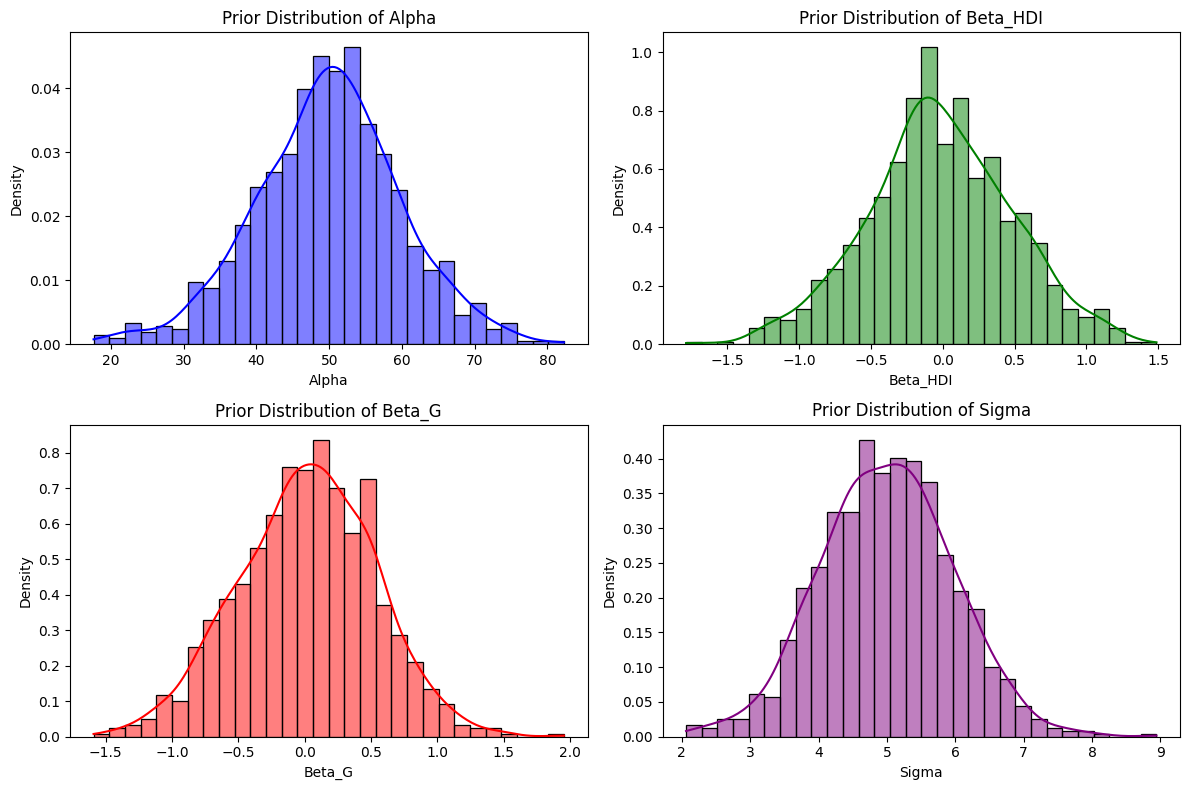

In [117]:
# Simulate parameter values from the priors
n_samples = 1000
alpha_prior = np.random.normal(50, 10, n_samples)
beta_1_prior = np.random.normal(0, 0.5, n_samples)
beta_2_prior = np.random.normal(0, 0.5, n_samples)
sigma_prior = np.random.normal(5, 1, n_samples)

# Ensure sigma values are positive
sigma_prior = sigma_prior[sigma_prior > 0]

# Create a DataFrame for easier manipulation
priors_df = pd.DataFrame({
    'Alpha': alpha_prior,
    'Beta_HDI': beta_1_prior,
    'Beta_G': beta_2_prior,
    'Sigma': sigma_prior
})

# Plot the distributions of the simulated prior values using seaborn
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(priors_df['Alpha'], bins=30, kde=True, stat="density", ax=axes[0, 0], color='blue').set_title('Prior Distribution of Alpha')
sns.histplot(priors_df['Beta_HDI'], bins=30, kde=True, stat="density", ax=axes[0, 1], color='green').set_title('Prior Distribution of Beta_HDI')
sns.histplot(priors_df['Beta_G'], bins=30, kde=True, stat="density", ax=axes[1, 0], color='red').set_title('Prior Distribution of Beta_G')
sns.histplot(priors_df['Sigma'], bins=30, kde=True, stat="density", ax=axes[1, 1], color='purple').set_title('Prior Distribution of Sigma')

plt.tight_layout()
plt.show()

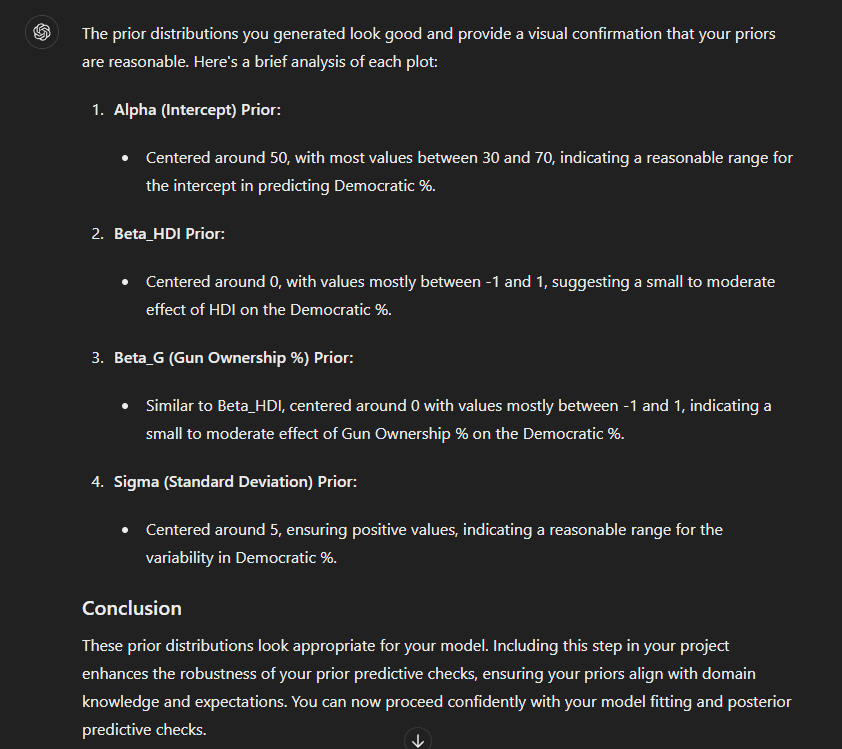
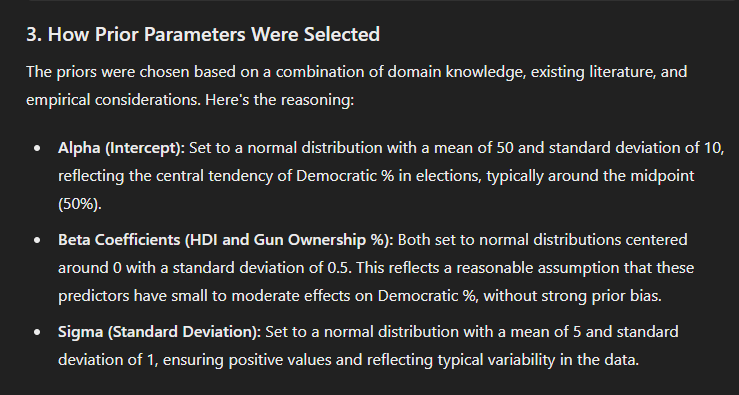

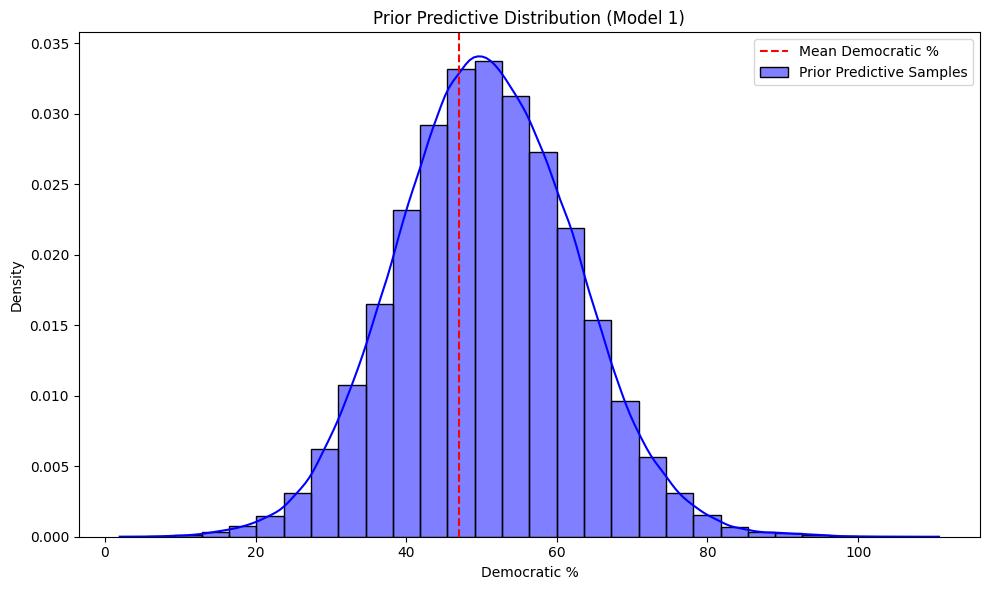

Mean Democratic %: 47.02867647058824
Min Democratic %: 21.9
Max Democratic %: 92.5


In [118]:
# Extract prior predictive samples
y_rep_prior = fit_prior.draws_pd()
y_rep_prior = y_rep_prior.filter(regex='y_rep')

# Flatten the values for plotting
y_rep_prior_flat = y_rep_prior.values.flatten()

# Plot the prior predictive samples using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(y_rep_prior_flat, bins=30, kde=True, stat="density", alpha=0.5, label='Prior Predictive Samples', color='blue')

# Add mean line
mean_democratic_pct = data['Democratic %'].mean() * 100
plt.axvline(x=mean_democratic_pct, color='r', linestyle='--', label='Mean Democratic %')

# Customize the plot
plt.xlabel('Democratic %')
plt.ylabel('Density')
plt.legend()
plt.title('Prior Predictive Distribution (Model 1)')
plt.tight_layout()
plt.show()

print(f"Mean Democratic %: {mean_democratic_pct}")
print(f"Min Democratic %: {data['Democratic %'].min() * 100}")
print(f"Max Democratic %: {data['Democratic %'].max() * 100}")

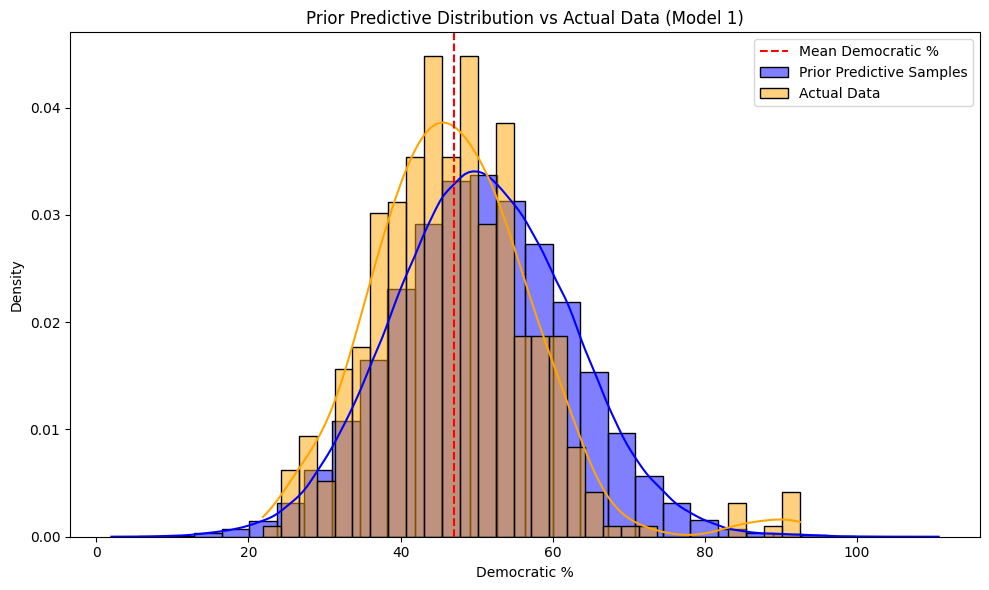

In [119]:
# Plot the prior predictive samples and actual data using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(y_rep_prior_flat, bins=30, kde=True, stat="density", alpha=0.5, label='Prior Predictive Samples', color='blue')
sns.histplot(data['Democratic %'].values * 100, bins=30, kde=True, stat="density", alpha=0.5, label='Actual Data', color='orange')

# Add mean line
mean_democratic_pct = data['Democratic %'].mean() * 100
plt.axvline(x=mean_democratic_pct, color='r', linestyle='--', label='Mean Democratic %')

# Customize the plot
plt.xlabel('Democratic %')
plt.ylabel('Density')
plt.legend()
plt.title('Prior Predictive Distribution vs Actual Data (Model 1)')
plt.tight_layout()
plt.show()

## Posterior Analysis for Model 1

In [106]:
# Prepare data for posterior predictive check
stan_data_posterior = {
    'N': len(data),
    'HDI': data['HDI'].values,
    'G': data['Gun ownership %'].values,
    'V': data['Democratic %'].values * 100 # type: ignore
}

# Compile and run the posterior predictive model
stan_file_posterior = 'model_1_posterior.stan'
model_posterior = CmdStanModel(stan_file=stan_file_posterior)
fit_posterior = model_posterior.sample(data=stan_data_posterior, chains=1, seed=28052020, show_console=True)
print(fit_posterior.diagnose())

18:48:49 - cmdstanpy - INFO - Chain [1] start processing


Chain [1] method = sample (Default)
Chain [1] sample
Chain [1] num_samples = 1000 (Default)
Chain [1] num_warmup = 1000 (Default)
Chain [1] save_warmup = 0 (Default)
Chain [1] thin = 1 (Default)
Chain [1] adapt
Chain [1] engaged = 1 (Default)
Chain [1] gamma = 0.05 (Default)
Chain [1] delta = 0.8 (Default)
Chain [1] kappa = 0.75 (Default)
Chain [1] t0 = 10 (Default)
Chain [1] init_buffer = 75 (Default)
Chain [1] term_buffer = 50 (Default)
Chain [1] window = 25 (Default)
Chain [1] save_metric = 0 (Default)
Chain [1] algorithm = hmc (Default)
Chain [1] hmc
Chain [1] engine = nuts (Default)
Chain [1] nuts
Chain [1] max_depth = 10 (Default)
Chain [1] metric = diag_e (Default)
Chain [1] metric_file =  (Default)
Chain [1] stepsize = 1 (Default)
Chain [1] stepsize_jitter = 0 (Default)
Chain [1] num_chains = 1 (Default)
Chain [1] id = 1 (Default)
Chain [1] data
Chain [1] file = C:\Users\szczy\AppData\Local\Temp\tmph7tu21uy\ouqd29wy.json
Chain [1] init = 2 (Default)
Chain [1] random
Chain [1] s

18:48:51 - cmdstanpy - INFO - Chain [1] done processing


Chain [1] Iteration: 1900 / 2000 [ 95%]  (Sampling)
Chain [1] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [1] 
Chain [1] Elapsed Time: 0.383 seconds (Warm-up)
Chain [1] 1.215 seconds (Sampling)
Chain [1] 1.598 seconds (Total)
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Processing csv files: C:\Users\szczy\AppData\Local\Temp\tmph7tu21uy\model_1_posteriori2lo68ey\model_1_posterior-20240616184849.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all 

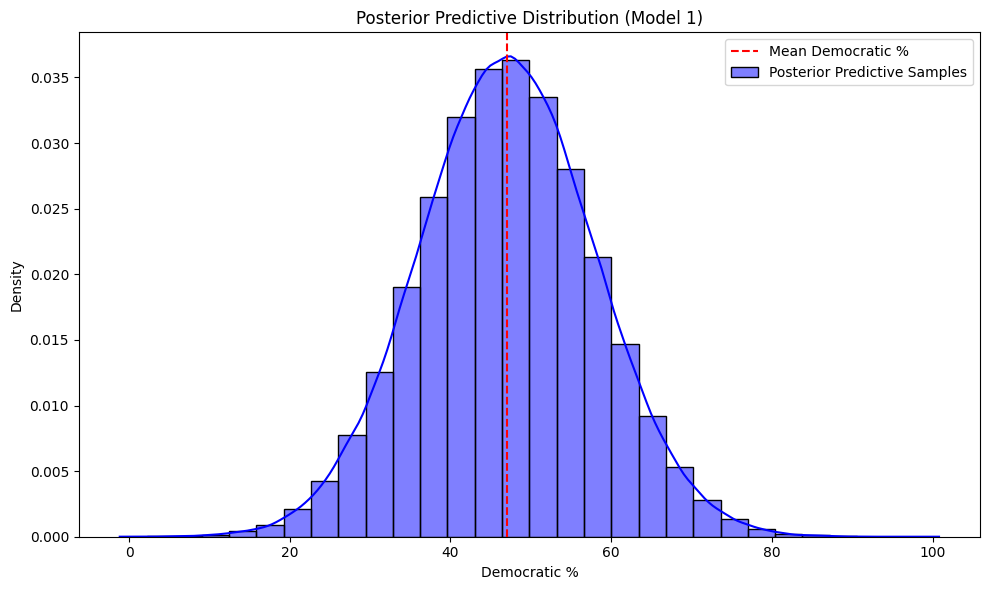

In [120]:
# Extract posterior predictive samples
y_rep_posterior = fit_posterior.draws_pd()
y_rep_posterior = y_rep_posterior.filter(regex='y_rep')

# Flatten the values for plotting
y_rep_posterior_flat = y_rep_posterior.values.flatten()

# Plot the posterior predictive samples using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(y_rep_posterior_flat, bins=30, kde=True, stat="density", alpha=0.5, label='Posterior Predictive Samples', color='blue')

# Add mean line
mean_democratic_pct = data['Democratic %'].mean() * 100
plt.axvline(x=mean_democratic_pct, color='r', linestyle='--', label='Mean Democratic %')

# Customize the plot
plt.xlabel('Democratic %')
plt.ylabel('Density')
plt.legend()
plt.title('Posterior Predictive Distribution (Model 1)')
plt.tight_layout()
plt.show()

## Posterior Predictive Distribution Analysis

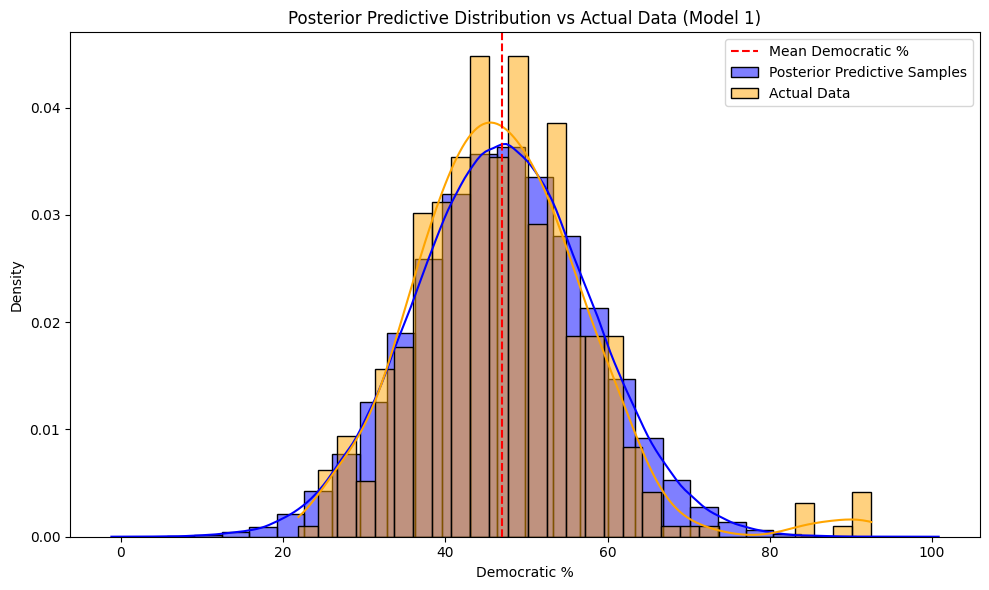

In [121]:
# Flatten the values for plotting
y_rep_posterior_flat = y_rep_posterior.values.flatten()
actual_data_flat = data['Democratic %'].values * 100

# Plot the posterior predictive samples and actual data using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(y_rep_posterior_flat, bins=30, kde=True, stat="density", alpha=0.5, label='Posterior Predictive Samples', color='blue')
sns.histplot(actual_data_flat, bins=30, kde=True, stat="density", alpha=0.5, label='Actual Data', color='orange')

# Add mean line
mean_democratic_pct = data['Democratic %'].mean() * 100
plt.axvline(x=mean_democratic_pct, color='r', linestyle='--', label='Mean Democratic %')

# Customize the plot
plt.xlabel('Democratic %')
plt.ylabel('Density')
plt.legend()
plt.title('Posterior Predictive Distribution vs Actual Data (Model 1)')
plt.tight_layout()
plt.show()

## Consistency with Data

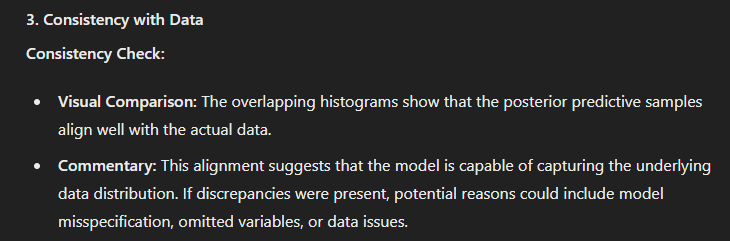

## Parameter Marginal Distributions

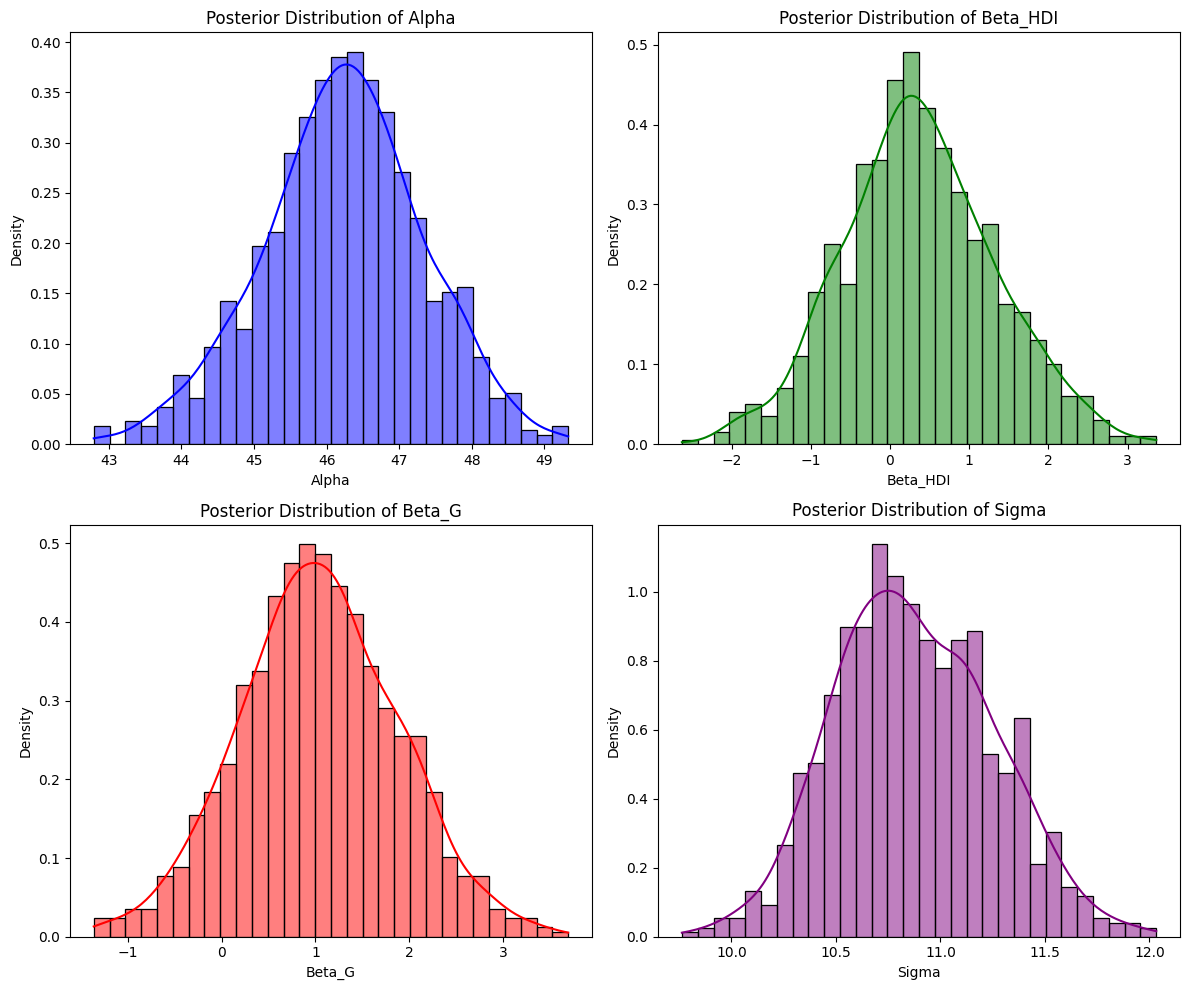

           count       mean       std       min        25%        50%  \
Alpha     1000.0  46.229538  1.099311  42.79220  45.531800  46.257050   
Beta_HDI  1000.0   0.366749  0.958315  -2.62721  -0.261801   0.327210   
Beta_G    1000.0   1.040888  0.844141  -1.36191   0.486168   1.035215   
Sigma     1000.0  10.873355  0.377295   9.76263  10.606450  10.848800   

                75%       max  
Alpha     46.945150  49.32630  
Beta_HDI   0.981104   3.36289  
Beta_G     1.608332   3.69331  
Sigma     11.133975  12.03290  


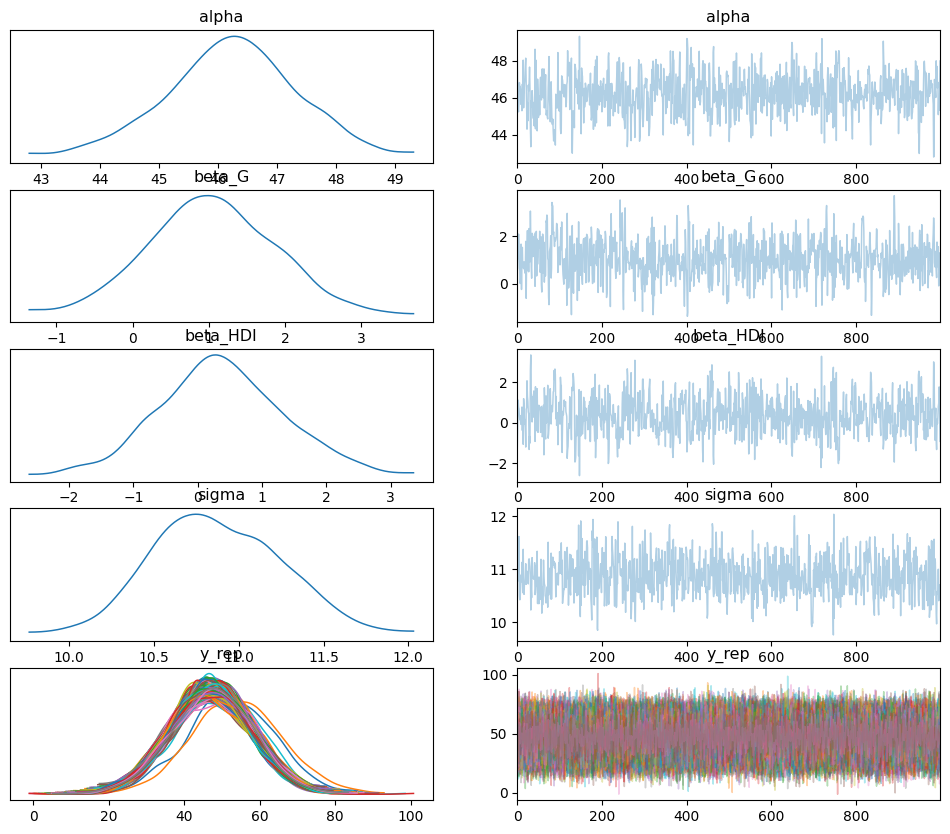

Processing csv files: C:\Users\szczy\AppData\Local\Temp\tmph7tu21uy\model_1_posteriori2lo68ey\model_1_posterior-20240616184849.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



In [116]:
# Extract parameter samples for alpha, beta_HDI, beta_G, and sigma
alpha_samples = fit_posterior.stan_variable('alpha')
beta_HDI_samples = fit_posterior.stan_variable('beta_HDI')
beta_G_samples = fit_posterior.stan_variable('beta_G')
sigma_samples = fit_posterior.stan_variable('sigma')

# Create a DataFrame for easier manipulation
params_df = pd.DataFrame({
    'Alpha': alpha_samples,
    'Beta_HDI': beta_HDI_samples,
    'Beta_G': beta_G_samples,
    'Sigma': sigma_samples
})

# Set the number of bins
bins = 30

# Plot histograms of the parameters using seaborn
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(params_df['Alpha'], bins=bins, kde=True, ax=axes[0, 0],stat="density", color='blue').set_title('Posterior Distribution of Alpha')
sns.histplot(params_df['Beta_HDI'], bins=bins, kde=True, ax=axes[0, 1], stat="density", color='green').set_title('Posterior Distribution of Beta_HDI')
sns.histplot(params_df['Beta_G'], bins=bins, kde=True, ax=axes[1, 0], stat="density", color='red').set_title('Posterior Distribution of Beta_G')
sns.histplot(params_df['Sigma'], bins=bins, kde=True, ax=axes[1, 1], stat="density", color='purple').set_title('Posterior Distribution of Sigma')
plt.tight_layout()
plt.show()

# Summarize the parameters
params_summary = params_df.describe().T
print(params_summary)

# Generate trace plots to check for convergence issues
az.plot_trace(fit_posterior)
plt.show()

# Calculate and display the diagnostics
print(fit_posterior.diagnose())

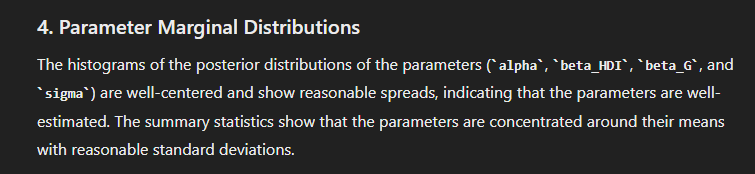

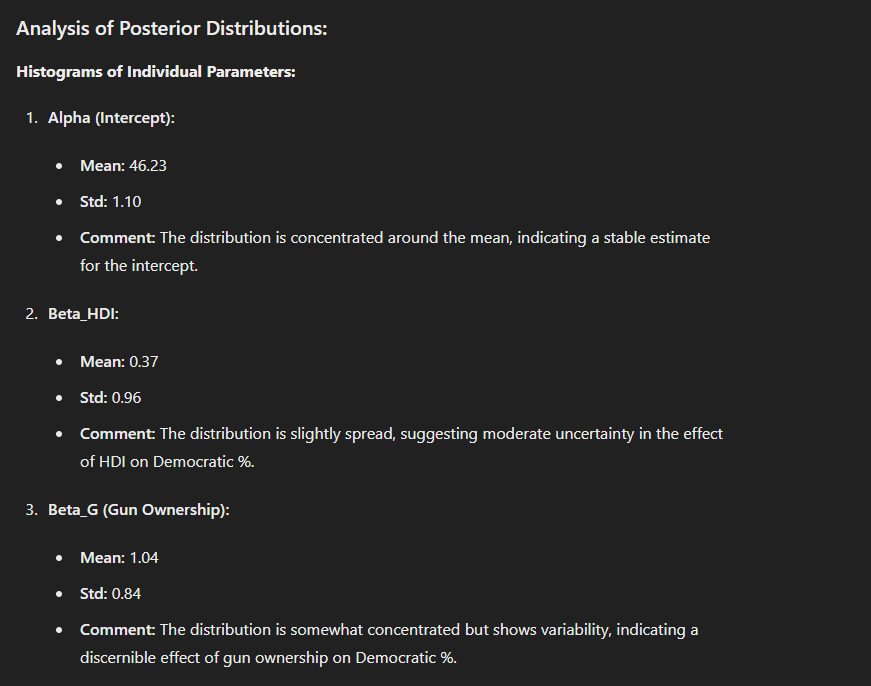

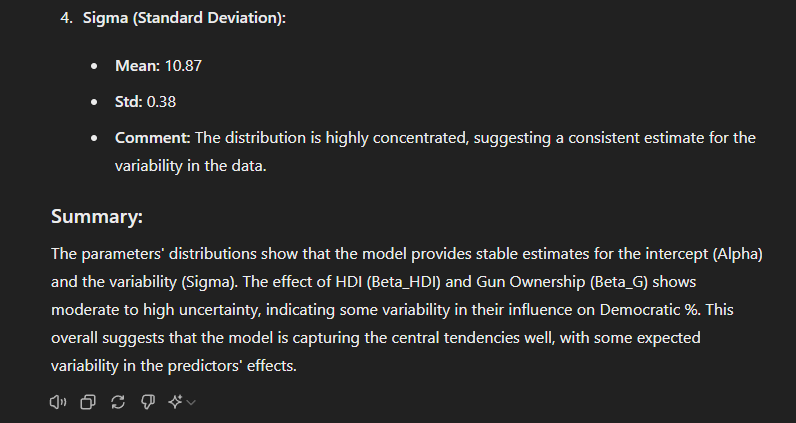

## Testing our final model

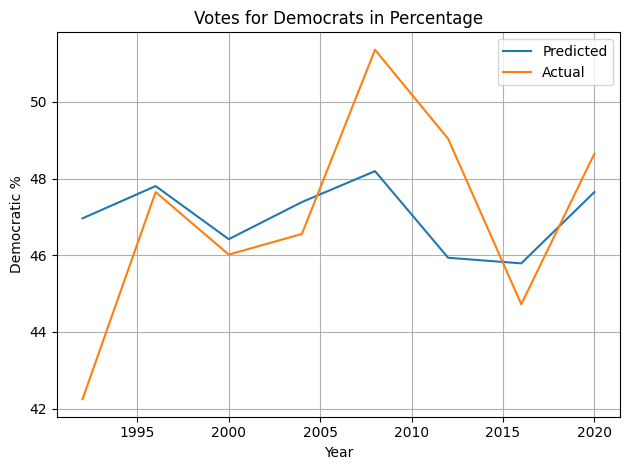

In [139]:
# Set a random seed for reproducibility
np.random.seed(42)

# Extract predicted values from the posterior samples
predicted_democratic_votes = []
for i in range(len(data)):
    sample_value = y_rep_posterior[f'y_rep[{i+1}]'].sample().values[0]
    predicted_democratic_votes.append(sample_value)

# Calculate mean predicted Democratic votes for each year
mean_predicted_democratic_votes = []
unique_years = data['Year'].unique()
for year in unique_years:
    indices = data[data['Year'] == year].index
    mean_value = np.mean([predicted_democratic_votes[i] for i in indices])
    mean_predicted_democratic_votes.append(mean_value)

# Actual mean Democratic votes per year
mean_democratic_votes = data.groupby('Year')['Democratic %'].mean().values * 100

# Plot the results
plt.plot(unique_years, mean_predicted_democratic_votes, label="Predicted")
plt.plot(unique_years, mean_democratic_votes, label="Actual")
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

## Creating training and testing dataframes

In [129]:
data['Year'] = data['Year'].astype(int)

# Split the data into training (1992-2016) and testing (2020) datasets
df_training = data[data['Year'] < 2020]
df_testing = data[data['Year'] == 2020]

# Print the number of rows in training and testing datasets
print(f"Training dataset: {len(df_training)} rows")
print(f"Testing dataset: {len(df_testing)} rows")

# Prepare the data for Stan
stan_data_train = {
    'N': len(df_training),
    'HDI': df_training['HDI'].values,
    'G': df_training['Gun ownership %'].values,
    'V': df_training['Democratic %'].values * 100  # type: ignore
}

stan_data_test = {
    'N': len(df_testing),
    'HDI': df_testing['HDI'].values,
    'G': df_testing['Gun ownership %'].values
}


Training dataset: 357 rows
Testing dataset: 51 rows


## Training the Model on the Training Dataset

In [130]:
# Compile and run the model on the training data
stan_file_train = 'model_1_posterior.stan'
model_train = CmdStanModel(stan_file=stan_file_train)
fit_train = model_train.sample(data=stan_data_train, chains=4, seed=42)

# Extract posterior means for parameters from training model
alpha_train = fit_train.stan_variable('alpha').mean()
beta_HDI_train = fit_train.stan_variable('beta_HDI').mean()
beta_G_train = fit_train.stan_variable('beta_G').mean()
sigma_train = fit_train.stan_variable('sigma').mean()

19:18:03 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)

chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)



chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:01 Iteration: 1900 / 2000 [ 95%]  (Sampling)

chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


19:18:05 - cmdstanpy - INFO - CmdStan done processing.


## Testing the Model on the Testing Dataset

In [137]:
# Extract posterior means for parameters from training model
alpha_train = fit_train.stan_variable('alpha').mean()
beta_HDI_train = fit_train.stan_variable('beta_HDI').mean()
beta_G_train = fit_train.stan_variable('beta_G').mean()

# Predict the Democratic votes for each state in 2020
predicted_votes_test = alpha_train + beta_HDI_train * df_testing['HDI'] + beta_G_train * df_testing['Gun ownership %']

# Calculate the mean predicted Democratic votes for the whole country in 2020
mean_predicted_votes_2020 = predicted_votes_test.mean()

# Calculate the actual mean Democratic votes for the whole country in 2020
mean_actual_votes_2020 = df_testing['Democratic %'].mean() * 100

# Print the results
print(f"Predicted mean Democratic votes for the whole country in 2020: {mean_predicted_votes_2020:.2f}%")
print(f"Actual mean Democratic votes for the whole country in 2020: {mean_actual_votes_2020:.2f}%")

Predicted mean Democratic votes for the whole country in 2020: 46.77%
Actual mean Democratic votes for the whole country in 2020: 48.65%


## 2nd model - Polynomial Regression Model

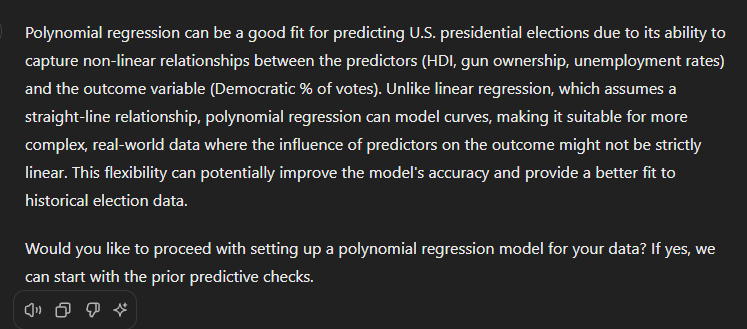

## Prior predictive checks

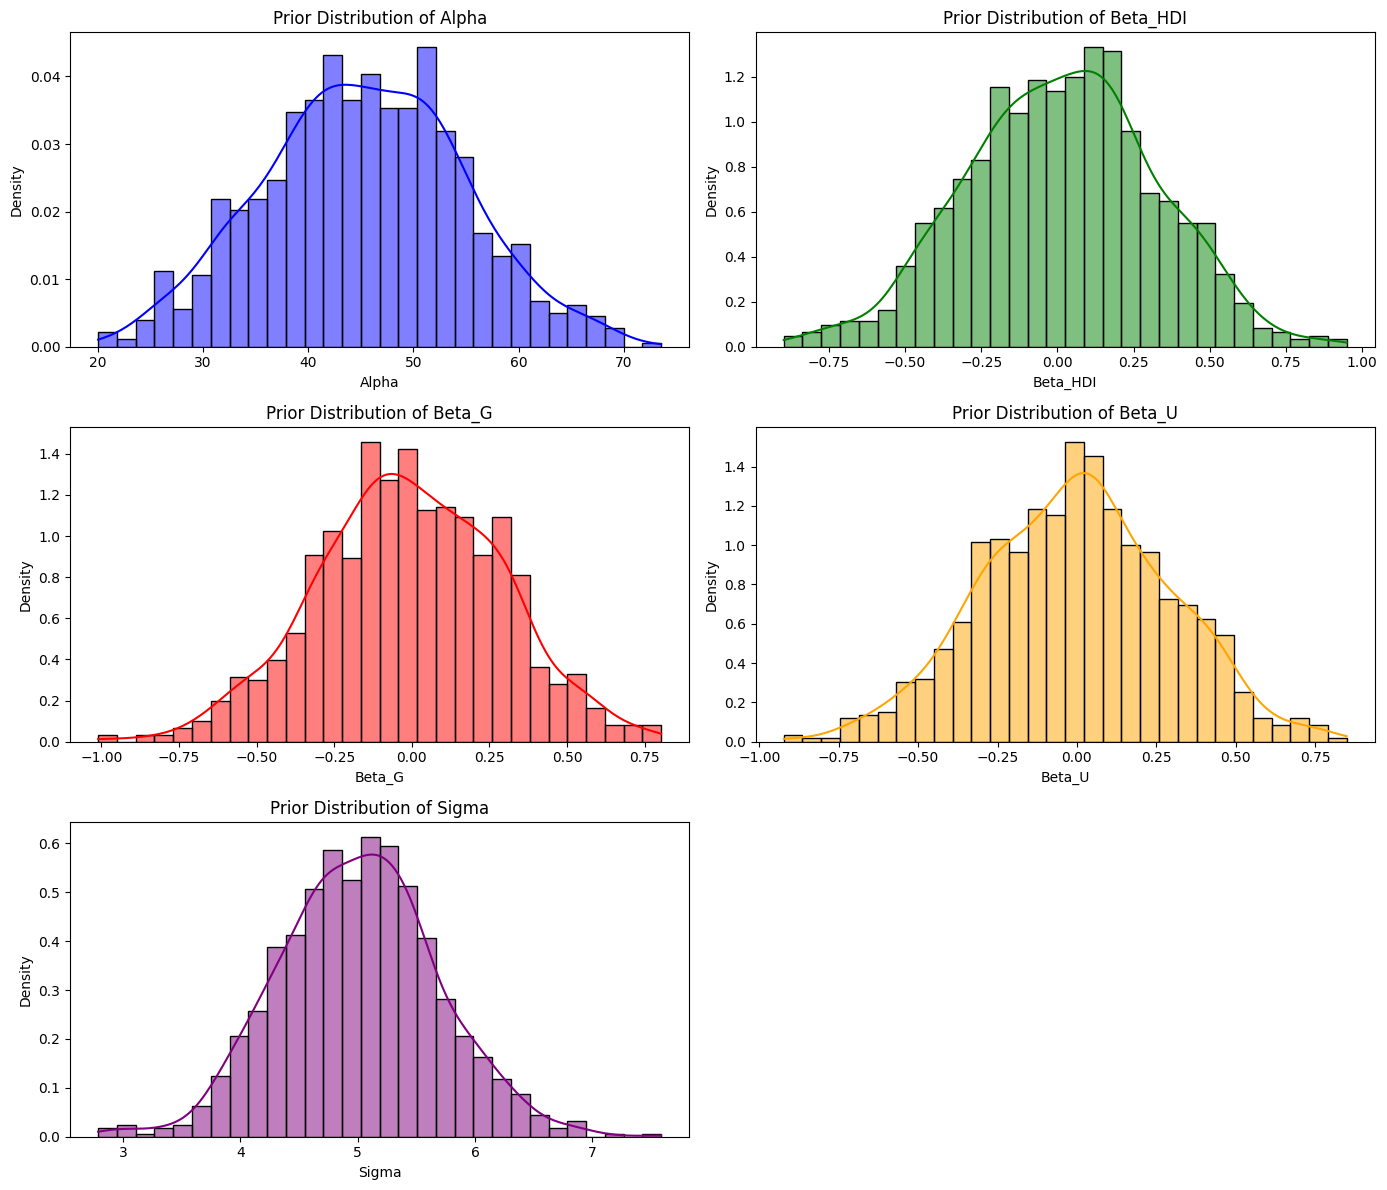

In [24]:
# Simulate parameter values from the priors
n_samples = 1000
alpha_prior = np.random.normal(45, 10, n_samples)
beta_HDI_prior = np.random.normal(0, 0.3, n_samples)
beta_G_prior = np.random.normal(0, 0.3, n_samples)
beta_U_prior = np.random.normal(0, 0.3, n_samples)
sigma_prior = np.random.normal(5, 0.7, n_samples)

# Ensure sigma values are positive
sigma_prior = sigma_prior[sigma_prior > 0]

# Create a DataFrame for easier manipulation
priors_df = pd.DataFrame({
    'Alpha': alpha_prior,
    'Beta_HDI': beta_HDI_prior,
    'Beta_G': beta_G_prior,
    'Beta_U': beta_U_prior,
    'Sigma': sigma_prior
})

# Plot the distributions of the simulated prior values using seaborn
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

sns.histplot(priors_df['Alpha'], bins=30, kde=True, stat="density", ax=axes[0, 0], color='blue').set_title('Prior Distribution of Alpha')
sns.histplot(priors_df['Beta_HDI'], bins=30, kde=True, stat="density", ax=axes[0, 1], color='green').set_title('Prior Distribution of Beta_HDI')
sns.histplot(priors_df['Beta_G'], bins=30, kde=True, stat="density", ax=axes[1, 0], color='red').set_title('Prior Distribution of Beta_G')
sns.histplot(priors_df['Beta_U'], bins=30, kde=True, stat="density", ax=axes[1, 1], color='orange').set_title('Prior Distribution of Beta_U')
sns.histplot(priors_df['Sigma'], bins=30, kde=True, stat="density", ax=axes[2, 0], color='purple').set_title('Prior Distribution of Sigma')

# Remove the last subplot which is empty
fig.delaxes(axes[2][1])

plt.tight_layout()
plt.show()

In [23]:
# Load and prepare the data
file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)
data = data.dropna()

# Prepare the data for Stan
stan_data = {
    'N': len(data),
    'HDI': data['HDI'].values,
    'G': data['Gun ownership %'].values,
    'U': data['Unemployment %'].values
}

# Compile the Stan model
stan_file = 'polynomial_prior_model.stan'
model = CmdStanModel(stan_file=stan_file)

# Run the prior predictive checks
fit_prior = model.sample(data=stan_data, chains=1, iter_sampling=1000, seed=42)

21:42:39 - cmdstanpy - INFO - compiling stan file C:\Users\szczy\Desktop\STUDIA\MAGIST~1\DATA_A~1\Project\PREDIC~1\polynomial_prior_model.stan to exe file C:\Users\szczy\Desktop\STUDIA\Magisterka sem1\Data_Analytics\Project\Predicting-USA-presidential-elections\polynomial_prior_model.exe
21:44:44 - cmdstanpy - INFO - compiled model executable: C:\Users\szczy\Desktop\STUDIA\Magisterka sem1\Data_Analytics\Project\Predicting-USA-presidential-elections\polynomial_prior_model.exe
21:44:46 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:01 Sampling completed                       


21:44:48 - cmdstanpy - INFO - CmdStan done processing.


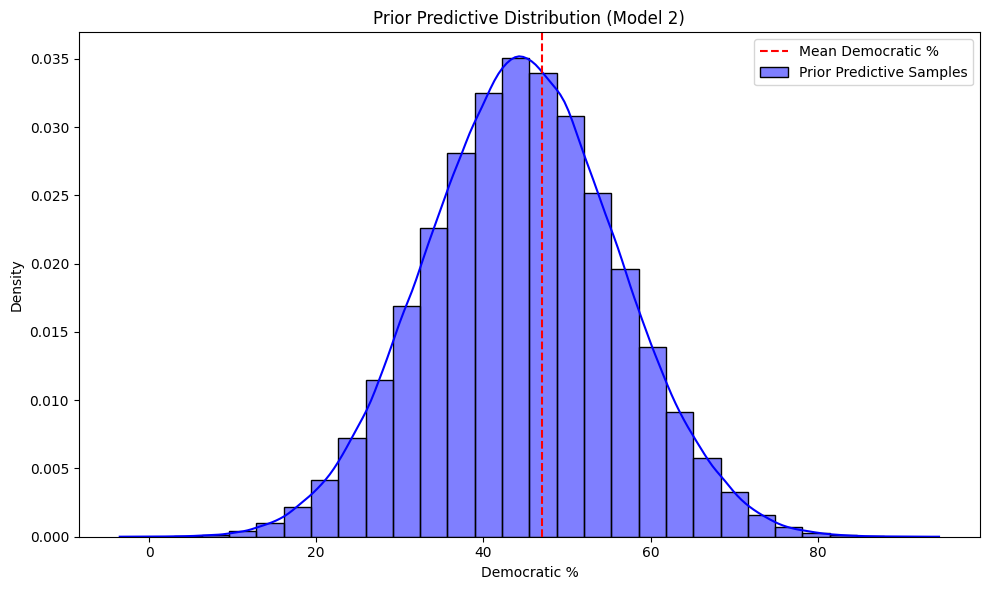

Mean Democratic %: 47.02867647058824
Min Democratic %: 21.9
Max Democratic %: 92.5


In [25]:
# Extract prior predictive samples
y_rep_prior = fit_prior.draws_pd()
y_rep_prior = y_rep_prior.filter(regex='y_rep')

# Flatten the values for plotting
y_rep_prior_flat = y_rep_prior.values.flatten()

# Plot the prior predictive samples using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(y_rep_prior_flat, bins=30, kde=True, stat="density", alpha=0.5, label='Prior Predictive Samples', color='blue')

# Add mean line
mean_democratic_pct = data['Democratic %'].mean() * 100
plt.axvline(x=mean_democratic_pct, color='r', linestyle='--', label='Mean Democratic %')

# Customize the plot
plt.xlabel('Democratic %')
plt.ylabel('Density')
plt.legend()
plt.title('Prior Predictive Distribution (Model 2)')
plt.tight_layout()
plt.show()

print(f"Mean Democratic %: {mean_democratic_pct}")
print(f"Min Democratic %: {data['Democratic %'].min() * 100}")
print(f"Max Democratic %: {data['Democratic %'].max() * 100}")

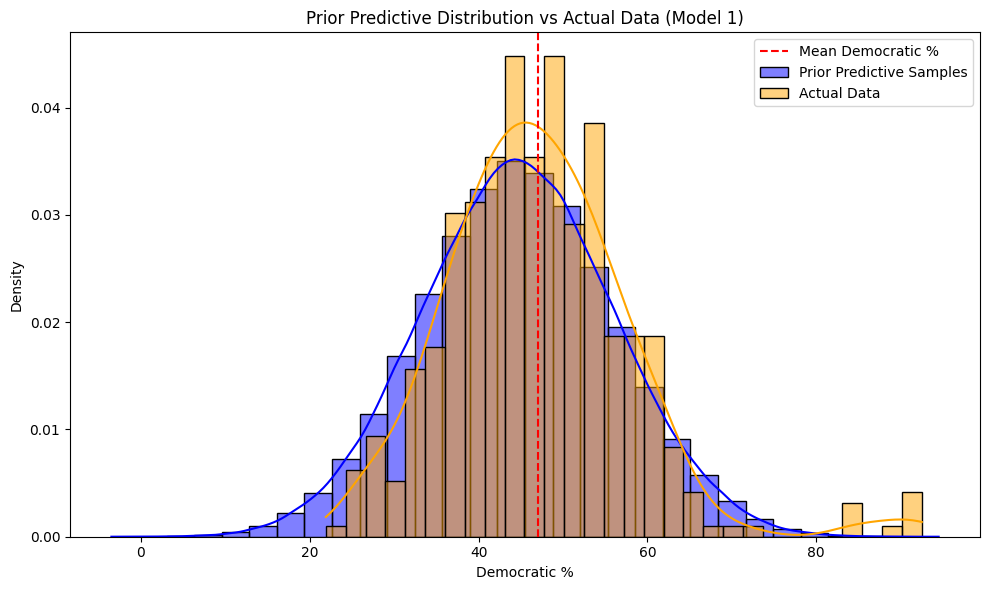

In [26]:
# Plot the prior predictive samples and actual data using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(y_rep_prior_flat, bins=30, kde=True, stat="density", alpha=0.5, label='Prior Predictive Samples', color='blue')
sns.histplot(data['Democratic %'].values * 100, bins=30, kde=True, stat="density", alpha=0.5, label='Actual Data', color='orange')

# Add mean line
mean_democratic_pct = data['Democratic %'].mean() * 100
plt.axvline(x=mean_democratic_pct, color='r', linestyle='--', label='Mean Democratic %')

# Customize the plot
plt.xlabel('Democratic %')
plt.ylabel('Density')
plt.legend()
plt.title('Prior Predictive Distribution vs Actual Data (Model 1)')
plt.tight_layout()
plt.show()